In [ ]:
!pip install pystan
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/323.1 kB ? eta -:--:--
     --------                                71.7/323.1 kB 3.8 MB/s eta 0:00:01
     -------------------------------------  317.4/323.1 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 323.1/323.1 kB 3.3 MB/s eta 0:00:00
                                              0.0/91.8 kB ? eta -:--:--
     ---------------------------------------- 91.8/91.8 kB ? eta 0:00:00
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
                                              0.0/16.2 MB ? eta -:--:--
     --                                       1.2/16.2 MB 37.0 MB/s eta 0:00:01
     ------               

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Vignesh\AppData\Local\Temp\pip-install-lac9tujt\pystan_5b8da59efc8940f19de30244ca63ed08\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/12.9 MB ? eta -:--:--
                                              0.2/12.9 MB 3.1 MB/s eta 0:00:05
     --                                       0.8/12.9 MB 9.6 MB/s eta 0:00:02
     --------                                 2.6/12.9 MB 18.6 MB/s eta 0:00:01
     ------------                             3.9/12.9 MB 21.0 MB/s eta 0:00:01
     ----------------                         5.5/12.9 MB 23.3 MB/s eta 0:00:01
     ---------------------                    6.9/12.9 MB 25.8 MB/s eta 0:00:01
     ------------------------                 7.7/12.9 MB 24.7 MB/s eta 0:00:01
     -------------------------                8.3/12.9 MB 23.1 MB/s eta 0:00:01
     -------------------------                8.3/12.9 MB 19.7 MB/s eta 0:00:01
     ------------------------------           9.7/12.9 MB 20.7 MB/s eta 0:00:01
     ------------------------------          10.2/12

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from prophet import Prophet

In [ ]:

import seaborn as sns
from sklearn import metrics
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selec

In [ ]:
fd = sns.load_dataset('flights')
fd.head()
fd.tail()
fd.shape

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


(144, 3)

In [ ]:
flight_data = sns.load_dataset("flights")
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flight_data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
flight_data_pivot = flight_data.pivot('month','year','passengers')
flight_data_pivot


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [ ]:
flight_data_pivot = flight_data.pivot('month','year','passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


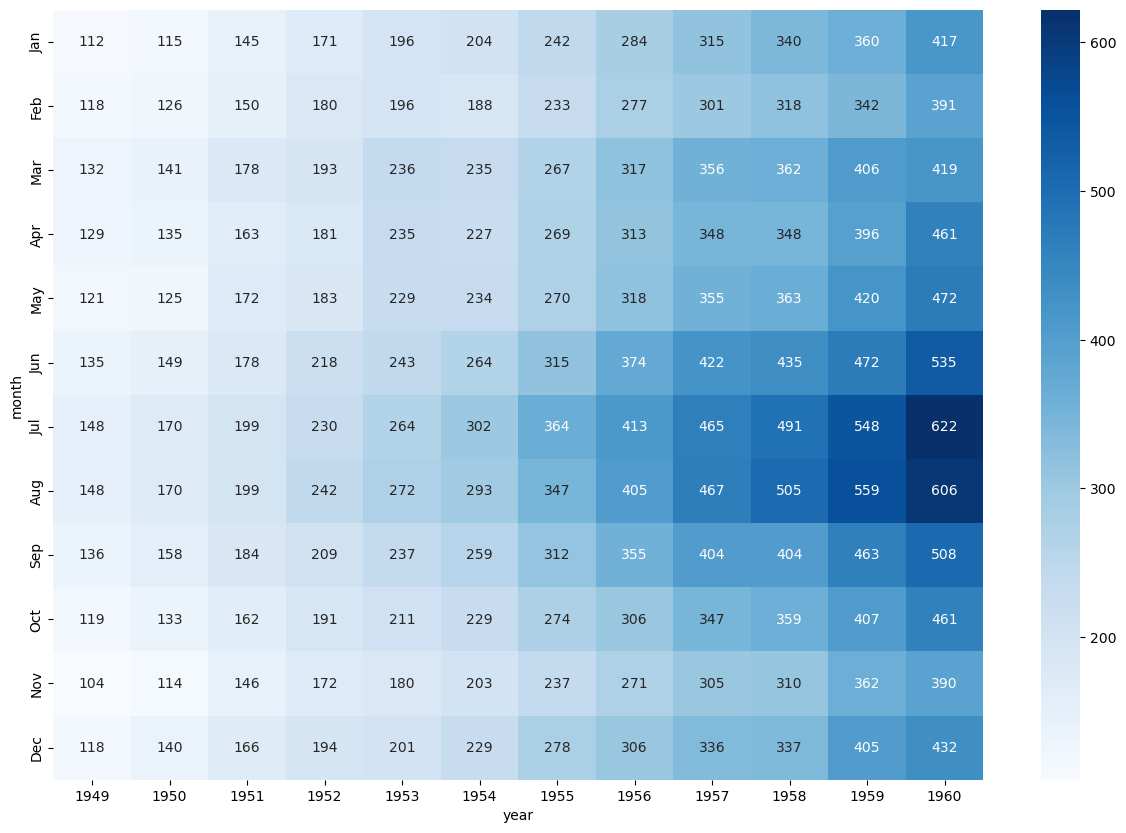

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(flight_data_pivot, annot= True, fmt = "d", cmap="Blues")
plt.show();

In [ ]:
# Create a date range variable which captures date range of the above data

In [ ]:
month = pd.date_range('19490131',periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   datestamp   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [ ]:
data = flight_data.loc[:,('datestamp', 'passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data.head()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [ ]:
data.set_index('datestamp', inplace= True)

In [ ]:
data.head()


,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [ ]:
data.to_csv('fligts.csv')

# New Section

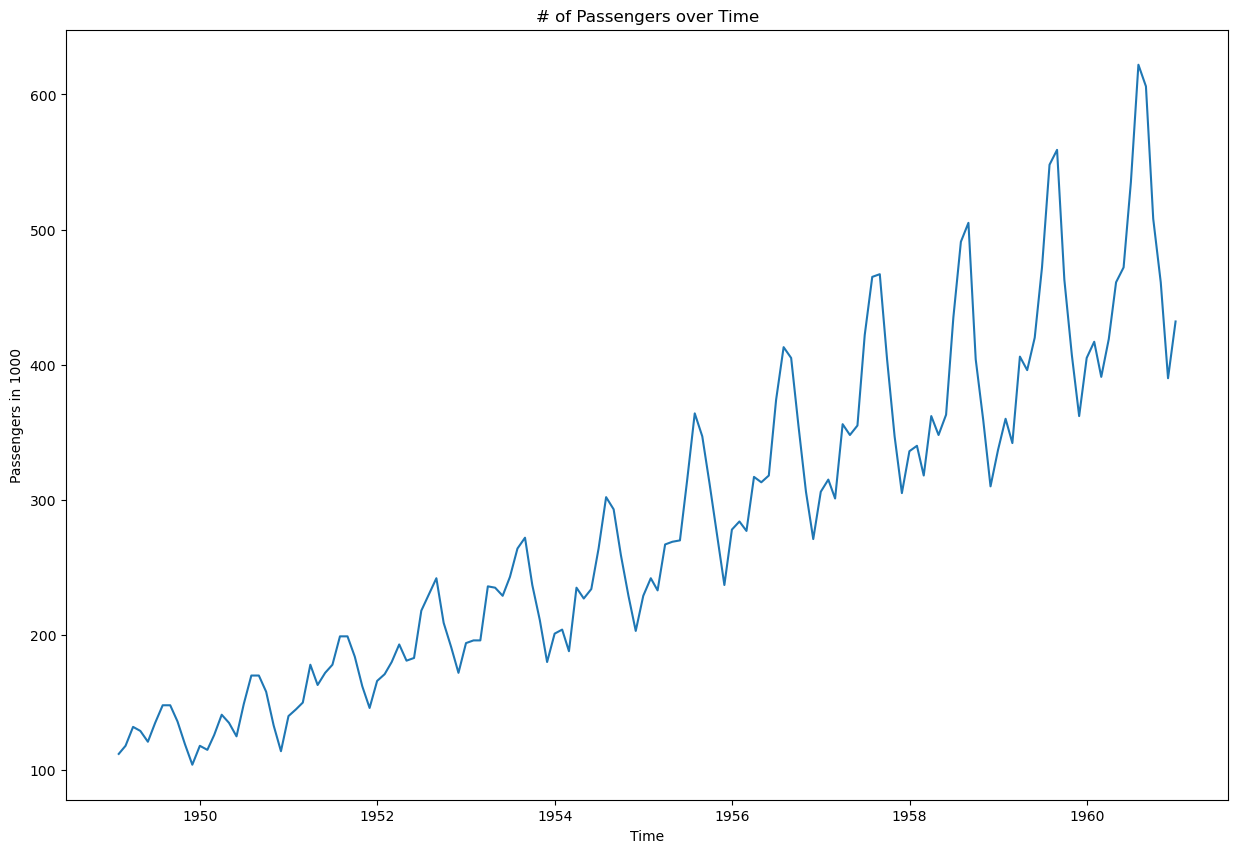

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel ('Time')
plt.ylabel ('Passengers in 1000')
plt.title ('# of Passengers over Time')
plt.show;

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model ='multiplicative', extrapolate_trend='freq')
trend = decomposition.trend
type(trend)
trend.head()

pandas.core.series.Series

ds
1949-01-31    118.588481
1949-02-28    119.734169
1949-03-31    120.879856
1949-04-30    122.025544
1949-05-31    123.171232
Name: trend, dtype: float64

In [ ]:
decomposition.trend.head(6)

ds
1949-01-31    118.588481
1949-02-28    119.734169
1949-03-31    120.879856
1949-04-30    122.025544
1949-05-31    123.171232
1949-06-30    124.316919
Name: trend, dtype: float64

In [ ]:
decomposition.seasonal.head(12)

ds
1949-01-31    0.911256
1949-02-28    0.890342
1949-03-31    1.012397
1949-04-30    0.980719
1949-05-31    0.979495
1949-06-30    1.108310
1949-07-31    1.229422
1949-08-31    1.219640
1949-09-30    1.056262
1949-10-31    0.920694
1949-11-30    0.797882
1949-12-31    0.893580
Name: seasonal, dtype: float64

In [ ]:
decomposition.resid.head()

ds
1949-01-31    1.036418
1949-02-28    1.106896
1949-03-31    1.078621
1949-04-30    1.077940
1949-05-31    1.002938
Name: resid, dtype: float64

In [ ]:
data.iloc[4,0]
print()
decomposition.trend.iloc[4,0]
print()
decomposition.seasonal.iloc[4,0]
print()
decomposition.resid.iloc[4,0]
print()
value = decomposition.resid.iloc[4,0]+decomposition.trend.iloc[4,0]+decomposition.seasonal.iloc[4,0]
value

121

IndexingError: Too many indexers

In [ ]:
decomposition.seasonal.to_csv('seaonal.csv')

In [ ]:
decomposition.resid.T

ds
1949-01-31    1.036418
1949-02-28    1.106896
1949-03-31    1.078621
1949-04-30    1.077940
1949-05-31    1.002938
                ...   
1960-08-31    1.021614
1960-09-30    0.980080
1960-10-31    1.011376
1960-11-30    0.978688
1960-12-31    0.959606
Name: resid, Length: 144, dtype: float64

In [ ]:
decomposition.trend.T


ds
1949-01-31    118.588481
1949-02-28    119.734169
1949-03-31    120.879856
1949-04-30    122.025544
1949-05-31    123.171232
                 ...    
1960-08-31    486.355575
1960-09-30    490.716443
1960-10-31    495.077312
1960-11-30    499.438180
1960-12-31    503.799048
Name: trend, Length: 144, dtype: float64

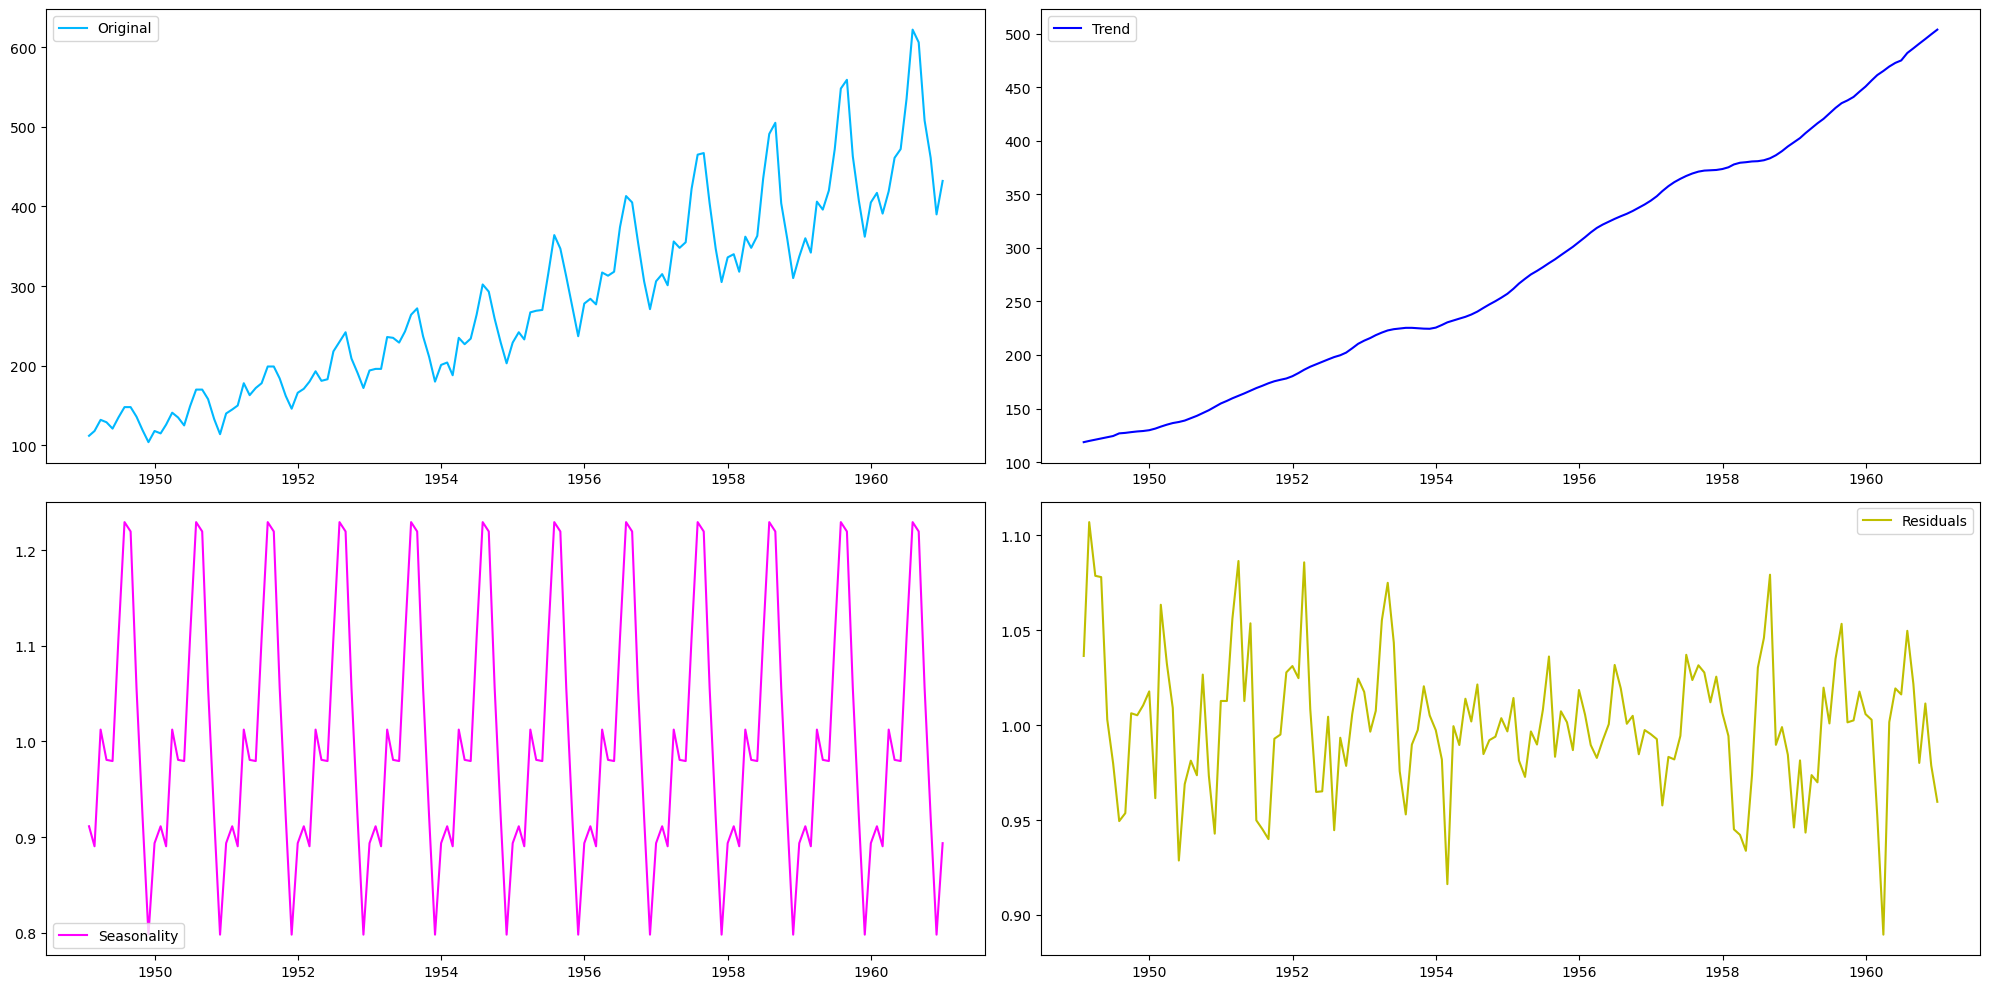

In [ ]:
# plot trend of the series
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data,color = '#00b8ff',label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,color = '#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [ ]:
trend

datestamp
1949-01-31    118.588481
1949-02-28    119.734169
1949-03-31    120.879856
1949-04-30    122.025544
1949-05-31    123.171232
                 ...    
1960-08-31    486.355575
1960-09-30    490.716443
1960-10-31    495.077312
1960-11-30    499.438180
1960-12-31    503.799048
Name: trend, Length: 144, dtype: float64

In [ ]:
seasonal

datestamp
1949-01-31   -23.790261
1949-02-28   -33.871846
1949-03-31    -1.682598
1949-04-30    -7.340572
1949-05-31    -4.866602
                ...    
1960-08-31    67.003453
1960-09-30    16.028936
1960-10-31   -22.317108
1960-11-30   -58.802042
1960-12-31   -32.773086
Name: seasonal, Length: 144, dtype: float64

In [ ]:
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [ ]:
data.reset_index(inplace=True)
data.head()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [ ]:
data = data.rename(columns={"datestamp":"ds", "passengers":"y"})
data.head()
data.shape

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


(144, 2)

In [ ]:
train, test = data[:132], data[132:]
train.shape
test.shape

(132, 2)

(12, 2)

In [ ]:
train.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [ ]:
test.tail()

,ds,y
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390
143,1960-12-31,432


In [ ]:
my_forecast = Prophet(interval_width=0.95)

In [ ]:
my_forecast.fit(train)

15:17:23 - cmdstanpy - INFO - Chain [1] start processing
15:17:24 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_periods = my_forecast.make_future_dataframe(periods=12, include_history=True, freq = 'M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
...,...
139,1960-08-31
140,1960-09-30
141,1960-10-31
142,1960-11-30


In [ ]:
forecast = my_forecast.predict(forecast_periods)
forecast.head(12)
forecast.to_csv("forecast.csv")
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.tail(12)
forecast3 = forecast.loc[:,['ds','yhat','yhat_lower','yhat_upper']]
forecast3.head(12)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-31,109.956977,40.557475,118.036919,109.956977,109.956977,-28.669640,-28.669640,-28.669640,-28.669640,-28.669640,-28.669640,0.0,0.0,0.0,81.287337
1,1949-02-28,111.934458,41.027142,117.549277,111.934458,111.934458,-31.297048,-31.297048,-31.297048,-31.297048,-31.297048,-31.297048,0.0,0.0,0.0,80.637409
2,1949-03-31,114.123811,77.558436,155.316591,114.123811,114.123811,0.584082,0.584082,0.584082,0.584082,0.584082,0.584082,0.0,0.0,0.0,114.707893
3,1949-04-30,116.242540,70.405423,148.616118,116.242540,116.242540,-8.289035,-8.289035,-8.289035,-8.289035,-8.289035,-8.289035,0.0,0.0,0.0,107.953505
4,1949-05-31,118.431894,70.799487,150.770343,118.431894,118.431894,-7.558638,-7.558638,-7.558638,-7.558638,-7.558638,-7.558638,0.0,0.0,0.0,110.873256
5,1949-06-30,120.550623,113.635991,190.842155,120.550623,120.550623,28.830268,28.830268,28.830268,28.830268,28.830268,28.830268,0.0,0.0,0.0,149.380891
6,1949-07-31,122.739977,138.399042,223.151482,122.739977,122.739977,58.739208,58.739208,58.739208,58.739208,58.739208,58.739208,0.0,0.0,0.0,181.479184
7,1949-08-31,124.929330,142.077088,224.798640,124.929330,124.929330,58.259205,58.259205,58.259205,58.259205,58.259205,58.259205,0.0,0.0,0.0,183.188535
8,1949-09-30,127.048059,101.196211,177.887495,127.048059,127.048059,13.026893,13.026893,13.026893,13.026893,13.026893,13.026893,0.0,0.0,0.0,140.074952
9,1949-10-31,129.237413,64.734215,144.037322,129.237413,129.237413,-24.308585,-24.308585,-24.308585,-24.308585,-24.308585,-24.308585,0.0,0.0,0.0,104.928828


,ds,yhat
132,1960-01-31,427.345755
133,1960-02-29,421.976285
134,1960-03-31,454.760665
135,1960-04-30,450.089107
136,1960-05-31,452.505172
137,1960-06-30,493.724739
138,1960-07-31,522.123724
139,1960-08-31,525.928233
140,1960-09-30,485.969501
141,1960-10-31,451.908203


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,81.287337,40.557475,118.036919
1,1949-02-28,80.637409,41.027142,117.549277
2,1949-03-31,114.707893,77.558436,155.316591
3,1949-04-30,107.953505,70.405423,148.616118
4,1949-05-31,110.873256,70.799487,150.770343
5,1949-06-30,149.380891,113.635991,190.842155
6,1949-07-31,181.479184,138.399042,223.151482
7,1949-08-31,183.188535,142.077088,224.798640
8,1949-09-30,140.074952,101.196211,177.887495
9,1949-10-31,104.928828,64.734215,144.037322


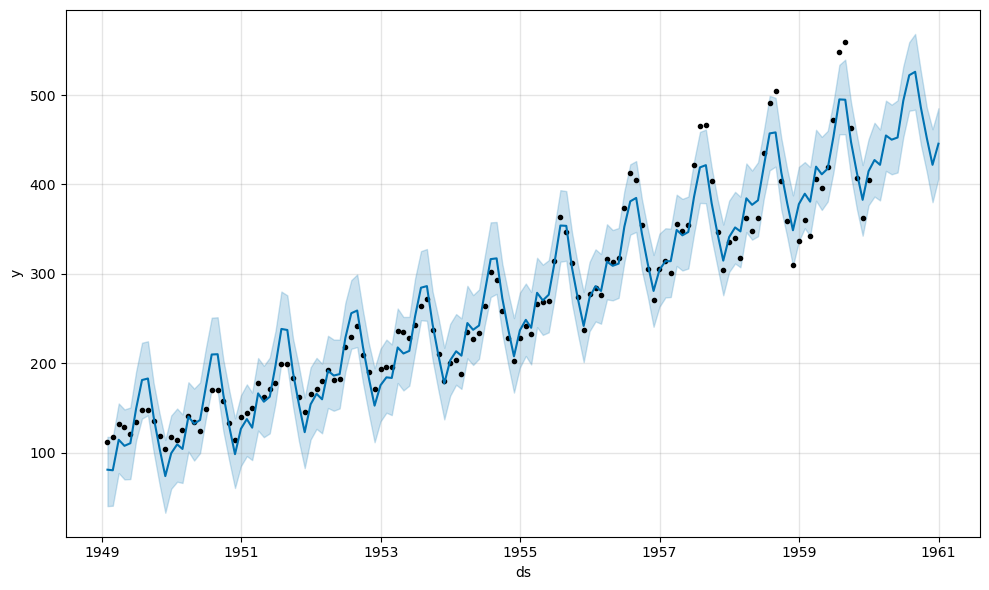

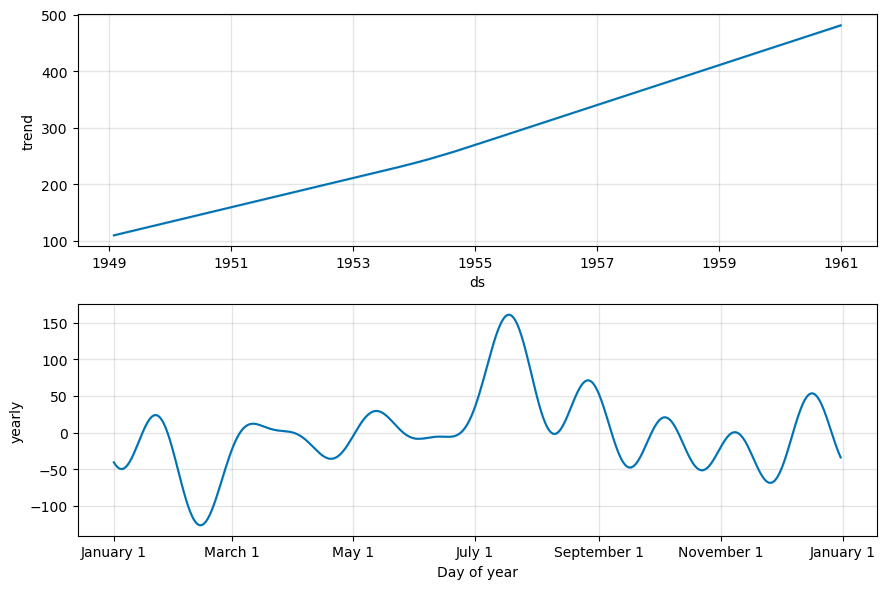

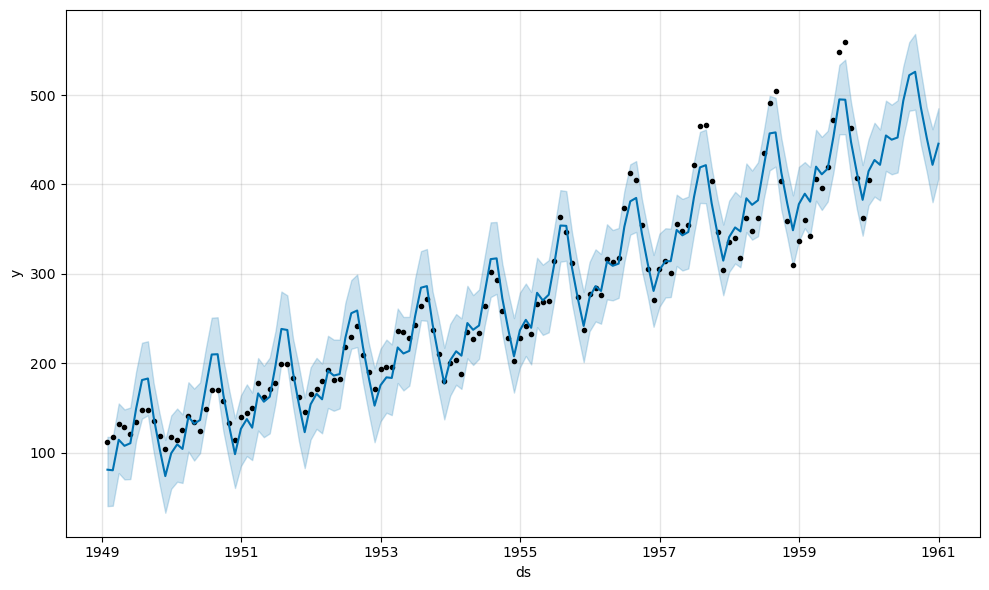

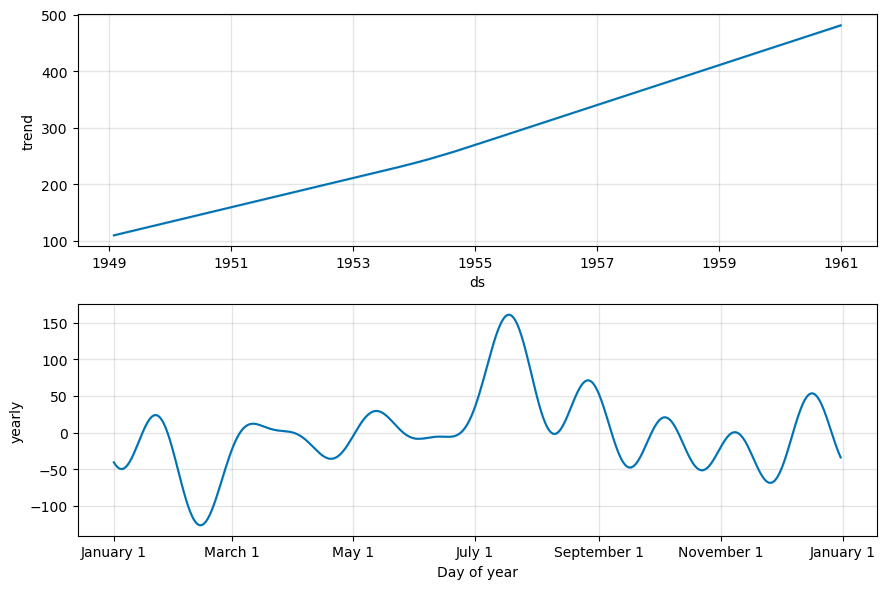

In [ ]:
my_forecast.plot(forecast, uncertainty= True)

my_forecast.plot_components(forecast, uncertainty = True)

In [ ]:
forecast1
final_df = pd.merge(forecast1, test, on = 'ds', how = 'inner')
final_df

,ds,yhat
0,1949-01-31,81.287337
1,1949-02-28,80.637409
2,1949-03-31,114.707893
3,1949-04-30,107.953505
4,1949-05-31,110.873256
...,...,...
139,1960-08-31,525.928233
140,1960-09-30,485.969501
141,1960-10-31,451.908203
142,1960-11-30,421.987096


,ds,yhat,y
0,1960-01-31,427.345755,417
1,1960-02-29,421.976285,391
2,1960-03-31,454.760665,419
3,1960-04-30,450.089107,461
4,1960-05-31,452.505172,472
5,1960-06-30,493.724739,535
6,1960-07-31,522.123724,622
7,1960-08-31,525.928233,606
8,1960-09-30,485.969501,508
9,1960-10-31,451.908203,461


In [ ]:
final_df = final_df.rename(columns={"yhat":"Prophet_Prediction","y":'actual'})

In [ ]:
final_df

,ds,Prophet_Prediction,actual
0,1960-01-31,427.345755,417
1,1960-02-29,421.976285,391
2,1960-03-31,454.760665,419
3,1960-04-30,450.089107,461
4,1960-05-31,452.505172,472
5,1960-06-30,493.724739,535
6,1960-07-31,522.123724,622
7,1960-08-31,525.928233,606
8,1960-09-30,485.969501,508
9,1960-10-31,451.908203,461


In [ ]:
np.round(metrics.mean_absolute_error(final_df.actual, final_df.Prophet_Prediction),2)

33.78

**HoltWinters**

In [ ]:
train.head() ; test.head()
train.shape
test.shape

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,ds,y
132,1960-01-31,417
133,1960-02-29,391
134,1960-03-31,419
135,1960-04-30,461
136,1960-05-31,472


(132, 2)

(12, 2)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

In [ ]:
model = HW(train.y, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
#create a forcast for the next 12 steps beyond the final data point in the training data set
Prediction = fitted.forecast(steps=12)
HW_Prediction=pd.DataFrame(Prediction)



In [ ]:
#print out the training summary
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          12594.613
Optimized:                         True   AIC                            633.685
Trend:                         Additive   BIC                            679.810
Seasonal:                Multiplicative   AICC                           639.738
Seasonal Periods:                    12   Date:                 Sat, 02 Sep 2023
Box-Cox:                          False   Time:                         16:08:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3762222                alpha                 True
smoothing_trend          

In [ ]:
HW_Prediction

,0
1960-01-31,417.285436
1960-02-29,394.061883
1960-03-31,462.444216
1960-04-30,448.597942
1960-05-31,471.870318
1960-06-30,539.893864
1960-07-31,623.823384
1960-08-31,631.154596
1960-09-30,515.580963
1960-10-31,449.902295


In [ ]:
HW_Prediction['ds'] = test.ds

AttributeError: 'DataFrame' object has no attribute 'ds'

In [ ]:
HW_Prediction

,0
1960-01-31,417.285436
1960-02-29,394.061883
1960-03-31,462.444216
1960-04-30,448.597942
1960-05-31,471.870318
1960-06-30,539.893864
1960-07-31,623.823384
1960-08-31,631.154596
1960-09-30,515.580963
1960-10-31,449.902295


In [ ]:

HW_Prediction = HW_Prediction.rename(columns={ 0:'HW_Prediction'})
HW_Prediction

,HW_Prediction
1960-01-31,417.285436
1960-02-29,394.061883
1960-03-31,462.444216
1960-04-30,448.597942
1960-05-31,471.870318
1960-06-30,539.893864
1960-07-31,623.823384
1960-08-31,631.154596
1960-09-30,515.580963
1960-10-31,449.902295


In [ ]:
final_df = pd.merge(final_df, HW_Prediction, on = 'ds', how = 'inner')
final_df

KeyError: 'ds'

In [ ]:
np.round(metrics.mean_absolute_error(final_df.actual, final_df.HW_Prediction),2)

AttributeError: 'DataFrame' object has no attribute 'HW_Prediction'

Build ARIMA Model

In [ ]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
data.set_index('ds', inplace= True)
data.head()

KeyError: "None of ['ds'] are in the columns"

In [ ]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data)

(0.01, False)

In [ ]:
train, test = data[:132], data[132:]
train.shape
test.shape

(132, 1)

(12, 1)

In [ ]:
train.head()
test.head()

,y
ds,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


,y
ds,
1960-01-31,417
1960-02-29,391
1960-03-31,419
1960-04-30,461
1960-05-31,472


In [ ]:
# fitting a stepwise model:
from pmdarima import auto_arima
Arima_model = auto_arima(train.y, start_p=0, start_q=0, d=1, max_p=8, max_q=8,max_d =2,start_P=0, start_Q=0, max_P=8, max_Q=8, m=12,
                          seasonal=True,trace=True, error_action='warn',suppress_warnings= True,
                          stepwise=True, random_state= 20, n_fits= 30)

Arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.21 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.212 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -447.951
Date:                            Sat, 02 Sep 2023   AIC                            899.902
Time:                                    16:28:38   BIC                            905.460
Sample:                                01-31-1949   HQIC                           902.159
                                     - 12-31-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2431      0.090     -2.697      0.007      -0.420      -0.066
sigma2       108.8757     13.306      8.183      0.000      82.797     134.954
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.89   Prob(JB):                         0.75
Heteroskedasticity (H):               1.47   Skew:                            -0.03
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(Arima_model.predict(n_periods=12), index = test.index)
prediction.columns = ['Arima_Prediction']
prediction

,Arima_Prediction
ds,
1960-01-31,424.109830
1960-02-29,407.055669
1960-03-31,470.825702
1960-04-30,460.881615
1960-05-31,484.868020
1960-06-30,536.871326
1960-07-31,612.870522
1960-08-31,623.870717
1960-09-30,527.870670


In [ ]:
final_df = pd.merge(final_df, prediction, how = 'inner', on = 'ds')

In [ ]:
final_df

,ds,Prophet_Prediction,actual,Arima_Prediction
0,1960-01-31,427.345755,417,424.109830
1,1960-02-29,421.976285,391,407.055669
2,1960-03-31,454.760665,419,470.825702
3,1960-04-30,450.089107,461,460.881615
4,1960-05-31,452.505172,472,484.868020
5,1960-06-30,493.724739,535,536.871326
6,1960-07-31,522.123724,622,612.870522
7,1960-08-31,525.928233,606,623.870717
8,1960-09-30,485.969501,508,527.870670
9,1960-10-31,451.908203,461,471.870681


In [ ]:
final_df = final_df.iloc[:,[0,2,1,3,4]]

IndexError: positional indexers are out-of-bounds

In [ ]:
final_df

,ds,Prophet_Prediction,actual,Arima_Prediction
0,1960-01-31,427.345755,417,424.109830
1,1960-02-29,421.976285,391,407.055669
2,1960-03-31,454.760665,419,470.825702
3,1960-04-30,450.089107,461,460.881615
4,1960-05-31,452.505172,472,484.868020
5,1960-06-30,493.724739,535,536.871326
6,1960-07-31,522.123724,622,612.870522
7,1960-08-31,525.928233,606,623.870717
8,1960-09-30,485.969501,508,527.870670
9,1960-10-31,451.908203,461,471.870681


In [ ]:
metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction)

18.52765300048767

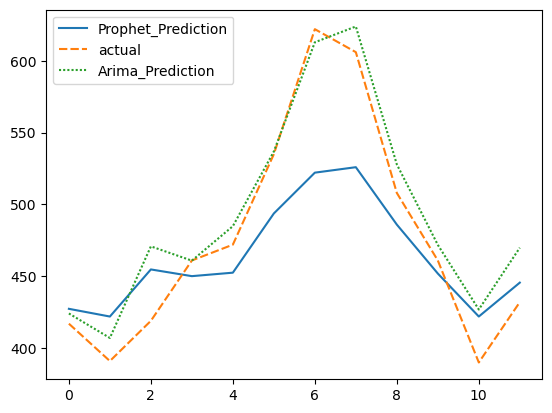

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=final_df)
plt.show();

In [ ]:
print('Prophet MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Prophet_Prediction),2)
print()
print('ARIMA MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction),2)
print()
print('Holt Winters MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction),2)

Prophet MAE


33.78


ARIMA MAE


18.53


Holt Winters MAE


18.53